In [ ]:
import sys
!{sys.executable} -m pip install ipywidgets
!{sys.executable} -m pip install ipympl

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
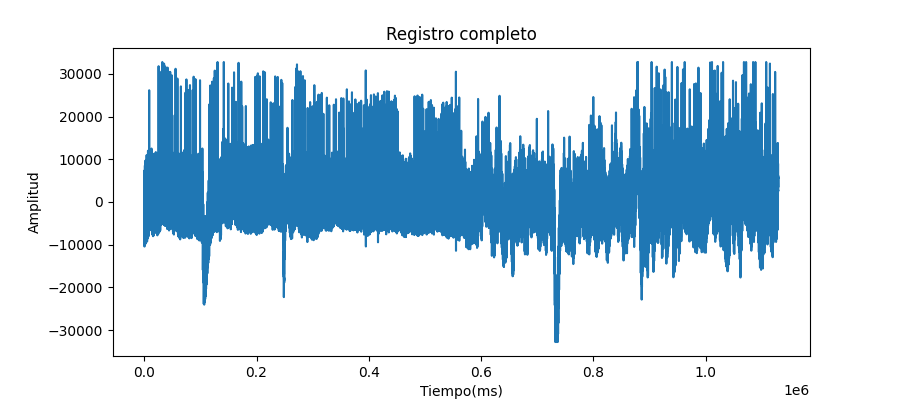

In [14]:
%matplotlib widget

import scipy.io as sio
import matplotlib.pyplot as plt
import numpy as np
from spectrum import WelchPeriodogram
import matplotlib.lines as mlines

mat_struct = sio.loadmat('ECG_TP4.mat')

fs = 1000

ecg = mat_struct['ecg_lead']
qrs_detections = mat_struct['qrs_detections']

offset = 300

plt.close('all')

plt.figure(0, figsize=(9, 4), dpi=100)
plt.plot(ecg)
plt.title("Registro completo")
plt.xlabel("Tiempo(ms)")
plt.ylabel("Amplitud")
plt.show()

Text(0, 0.5, 'Amplitud Normalizada')

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
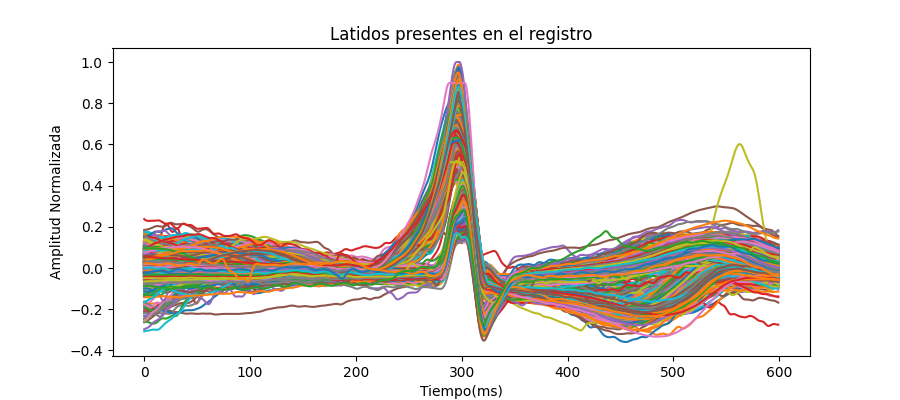

In [15]:
plt.figure(1, figsize=(9, 4), dpi=100)
ecg_mat = np.hstack([ecg[int(qrs)-offset : int(qrs)+offset] for qrs in qrs_detections])
mean_ecg_ = ecg_mat - np.mean(ecg_mat, axis=0)
mean_ecg = mean_ecg_/np.max(mean_ecg_)
plt.plot(mean_ecg)
plt.title("Latidos presentes en el registro")
plt.xlabel("Tiempo(ms)")
plt.ylabel("Amplitud Normalizada")

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
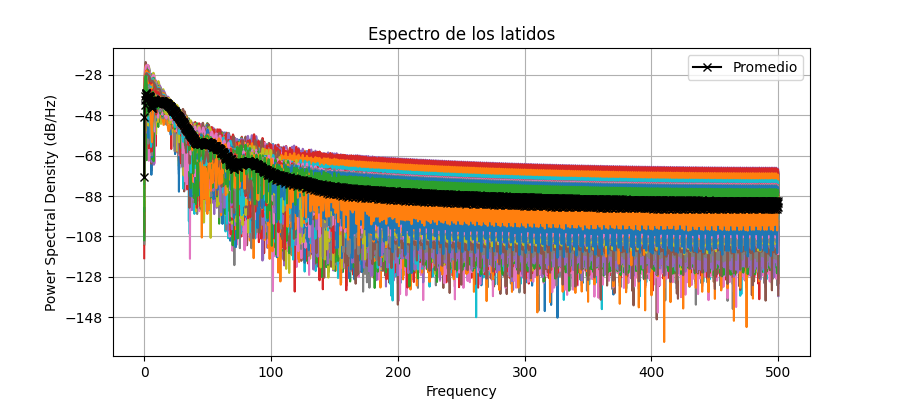

In [16]:
muestras = len(qrs_detections)
ecg_mat_pad = ecg_mat[:,:muestras] - np.mean(ecg_mat[:,:muestras], axis=0)
ecg_mat_pad = ecg_mat_pad/np.max(ecg_mat_pad)
ecg_mat_pad = np.pad(ecg_mat_pad, pad_width=((2000,2000),(0,0)), mode='constant')

dep = np.empty((2301, muestras))

plt.figure(2, figsize=(9, 4), dpi=100)
for i in range(muestras):
    pp, r = WelchPeriodogram(ecg_mat_pad[:, i], NFFT=len(ecg_mat_pad), sampling=fs)#, lag=3*N//4
    dep[:,i] = pp_welch = pp[0]
    f_welch = pp[1]    
plt.plot(f_welch, 10*np.log10(np.median(dep, axis=1)), 'kx-', label="Promedio")
plt.title("Espectro de los latidos")
plt.legend()

Text(0, 0.5, 'Espectros de latidos con 90% de la potencia')

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
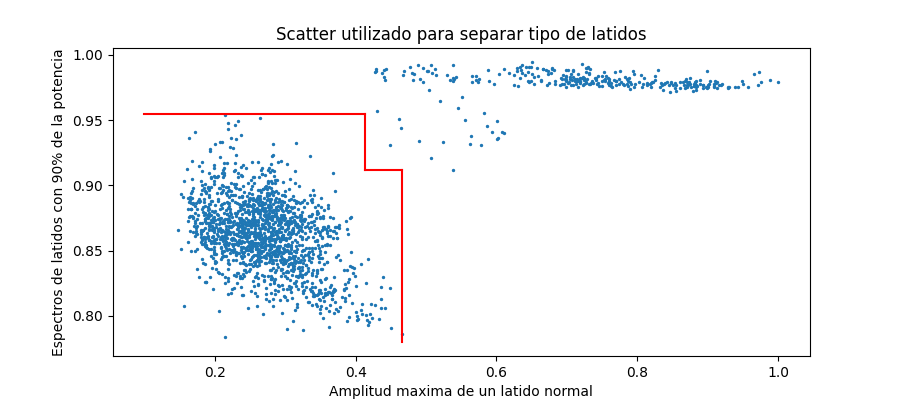

In [17]:
cum_area_all = np.cumsum(dep, axis=0)/np.sum(dep, axis=0)

aa = np.max(mean_ecg, axis=0)
bb = cum_area_all[94,:]

umbralA1 = 0.414
umbralB1 = 0.9549
umbralA2 = 0.4663
umbralB2 = 0.9116

plt.figure(3, figsize=(9, 5), dpi=100)
plt.scatter(aa, bb, s=2)
line = mlines.Line2D([0.10, umbralA1], [umbralB1, umbralB1], color='red', linewidth=0.5)
plt.plot(line.get_xdata(), line.get_ydata(), color='red')
line = mlines.Line2D([umbralA1, umbralA1], [umbralB2, umbralB1], color='red', linewidth=0.5)
plt.plot(line.get_xdata(), line.get_ydata(), color='red')
line = mlines.Line2D([umbralA1, umbralA2], [umbralB2, umbralB2], color='red', linewidth=0.5)
plt.plot(line.get_xdata(), line.get_ydata(), color='red')
line = mlines.Line2D([umbralA2, umbralA2], [0.78, umbralB2], color='red', linewidth=0.5)
plt.plot(line.get_xdata(), line.get_ydata(), color='red')
plt.title("Scatter utilizado para separar tipo de latidos")
plt.xlabel("Amplitud maxima de un latido normal")
plt.ylabel("Espectros de latidos con 90% de la potencia")

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
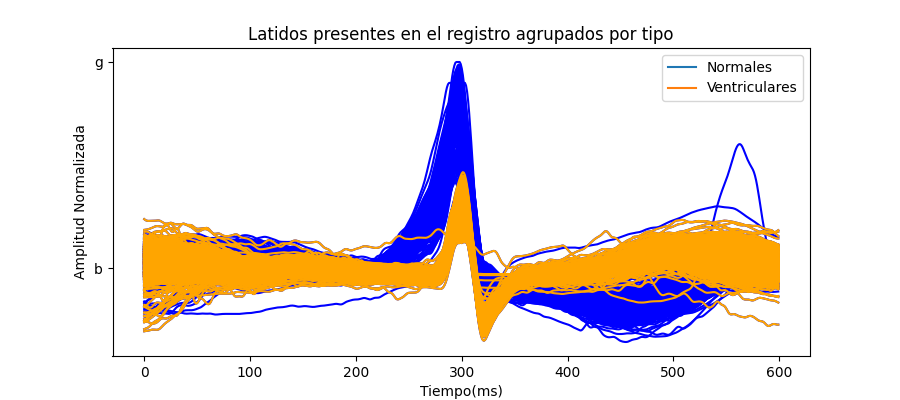

In [18]:
vent1 = np.bitwise_and(aa <= umbralA1, bb < umbralB1)
vent2 = np.bitwise_and(aa > umbralA1, bb < umbralB2)
vent3 = np.bitwise_and(aa <= umbralA2, bb < umbralB2)
vent4 = np.bitwise_and(vent2, vent3)
vent = np.bitwise_or(vent1, vent4)
nrm = ~np.bitwise_and(vent1, vent4)

plt.figure(4, figsize=(9, 5), dpi=100)
plt.plot(mean_ecg[:,nrm],'b')
plt.plot('b',label="Normales")
plt.plot(mean_ecg[:,vent],'orange')
plt.plot('g', label="Ventriculares")
plt.title("Latidos presentes en el registro agrupados por tipo")
plt.xlabel("Tiempo(ms)")
plt.ylabel("Amplitud Normalizada")
plt.legend()

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
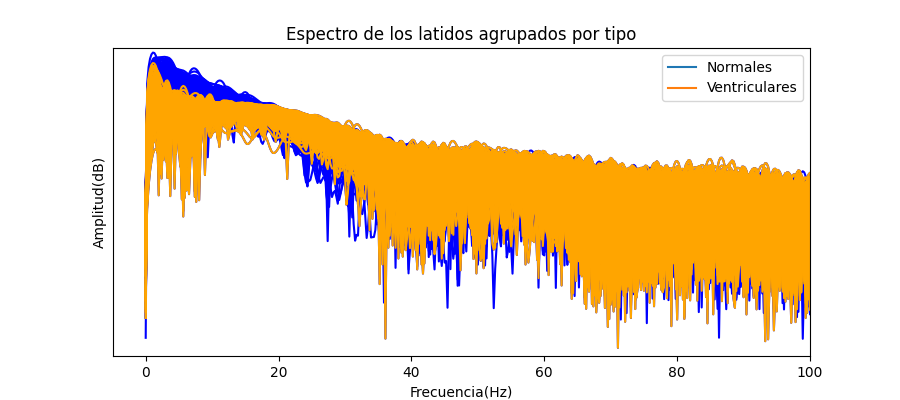

In [19]:
plt.figure(5, figsize=(9, 5), dpi=100)
plt.plot(f_welch, 10*np.log10(dep[:,nrm]), 'b')
plt.plot('b',label="Normales")
plt.plot(f_welch, 10*np.log10(dep[:,vent]), 'orange')
plt.plot('g', label="Ventriculares")
plt.xlim(-5, 100)
plt.ylim(-125, -20)
plt.title("Espectro de los latidos agrupados por tipo")
plt.xlabel("Frecuencia(Hz)")
plt.ylabel("Amplitud(dB)")
plt.legend()